# Unit Cell: First Steps
This notebook will introduce the different functions used to generate and visualize UnitCell objects. We will show two different methods to make them: built in types and arbitrary cells built from a list of vertices

In [31]:
from GraphCodes.UnitCell import UnitCell
from GraphCodes.resonator_utility import decorate_layout
import numpy as np
import matplotlib.pyplot as plt

## Built in UnitCell types 

In [4]:
#Here we are using the built in "Kagome" unit cell so we can simply specify the name and the code will generate everything for us
#Possible cells include: Huse, kagome, PeterChain, PeterChain, square
cell = UnitCell('kagome')

Text(0.5, 1.0, 'Kagome unit cell with annotations')

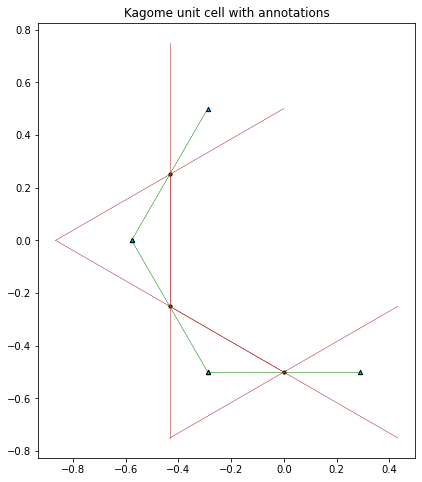

In [30]:
plt.figure(figsize=(13,8))
ax = plt.subplot(111)
cell.draw_sites(ax) #This draws the actual sites of the effective lattice 
cell.draw_resonators(ax) #Draws the real resonators we actually write on the chip
cell.draw_SDlinks(ax) #Draws the effective hopping vertices on the "semidual lattice"
cell.draw_resonator_end_points(ax, color='deepskyblue', edgecolor='k', marker='^', size=18) #Draw the connection points between resonators
plt.title('Kagome unit cell with annotations')

## Arbitrary Unit Cells

In [41]:
# Make some really basic Unitcells from a resonator list
cellRes = np.asarray([[0,0,1,0], [0,0,0.5,0.5]])
a1 = np.asarray([1,0])
a2 = np.asarray([0,1])
#Note: maxDegree tracks what the maximum number of connections exist at any given lattice site
#it defaults to 3 since that's the only thing we can do in hardware. 
currCell = UnitCell(lattice_type = '1Dchain', resonators = cellRes, a1 = a1, a2 = a2, maxDegree=4)

C:\Users\Kollarlab\Desktop\GraphCodes\GraphCodes\UnitCell.py:1032: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if resonators == '':


Text(0.5, 1.0, 'Basic unitcell from resonator list with annotations')

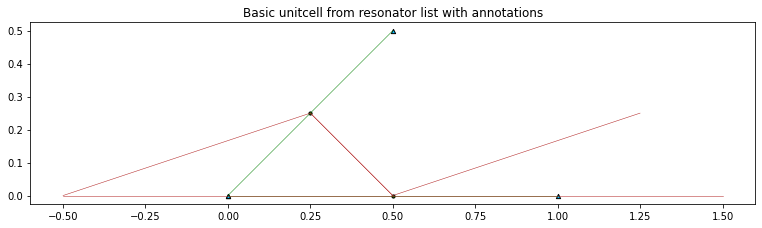

In [42]:
plt.figure(figsize=(13,8))
ax = plt.subplot(111)
currCell.draw_sites(ax) #This draws the actual sites of the effective lattice 
currCell.draw_resonators(ax) #Draws the real resonators we actually write on the chip
currCell.draw_SDlinks(ax) #Draws the effective hopping vertices on the "semidual lattice"
currCell.draw_resonator_end_points(ax, color='deepskyblue', edgecolor='k', marker='^', size=18) #Draw the connection points between resonators
plt.title('Basic unitcell from resonator list with annotations')

In [39]:
# In this example we make a ring resonator unit cell from a list of resonators.

N = 10

resMatrix = np.zeros((N,4))

thetas = np.arange(0, 2*np.pi, 2*np.pi/N)
xPoints = np.cos(thetas)
yPoints = np.sin(thetas)

for rind in range(0, N):
    x0 = xPoints[rind]
    y0 = yPoints[rind]
    
    x1 = xPoints[np.mod(rind+1, N)]
    y1 = yPoints[np.mod(rind+1, N)]
    
    resMatrix[rind,:] = [x0, y0 ,x1, y1]

ring = UnitCell('Ring', resonators=resMatrix)

C:\Users\Kollarlab\Desktop\GraphCodes\GraphCodes\UnitCell.py:1032: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if resonators == '':


Text(0.5, 1.0, 'Ring unitcell from resonator list with annotations')

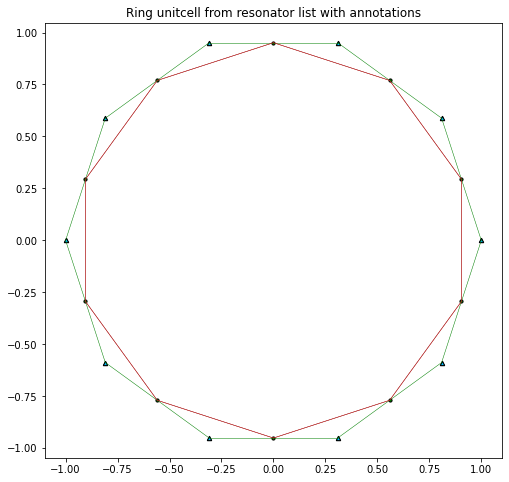

In [40]:
plt.figure(figsize=(13,8))
ax = plt.subplot(111)
ring.draw_sites(ax) #This draws the actual sites of the effective lattice 
ring.draw_resonators(ax) #Draws the real resonators we actually write on the chip
ring.draw_SDlinks(ax) #Draws the effective hopping vertices on the "semidual lattice"
ring.draw_resonator_end_points(ax, color='deepskyblue', edgecolor='k', marker='^', size=18) #Draw the connection points between resonators
plt.title('Ring unitcell from resonator list with annotations')

## Compound Unit Cells

In [37]:
#We can effectively convolve two types of unitcells to create a much more complex structure using the "decorate layout" function
#Note, this seems to work better with "quasi 1D" lattice since it effectively replaces every resonator with the unitcell
#Let's start with a square unit cell and decorate it with a PeterChain structure at each lattice site

baseCell = UnitCell('square')
subCell  = UnitCell('PeterChain')

#The decorate layout function takes as input two sets of resonators and performs the convolution on them returning another list of resonators
deco_res  = decorate_layout(baseCell.resonators, subCell.resonators)
#Ok, there is a lot going on here, the UnitCell function can either take in a name of an existing cell (the method we've used above) or take
# in a list of resonators as well as basis vectors telling the code how it should extend the cell into a lattice 
finalCell = UnitCell('PeterChain_square',resonators=deco_res, a1=baseCell.a1, a2=baseCell.a2)

C:\Users\Kollarlab\Desktop\GraphCodes\GraphCodes\UnitCell.py:1032: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if resonators == '':


Text(0.5, 1.0, 'Decorated final cell')

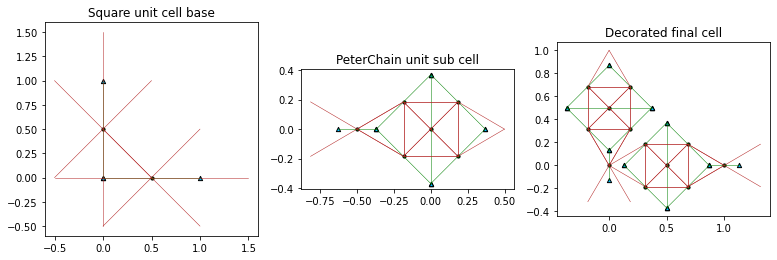

In [38]:
plt.figure(figsize=(13,8))
ax = plt.subplot(131)
baseCell.draw_sites(ax) #This draws the actual sites of the effective lattice 
baseCell.draw_resonators(ax) #Draws the real resonators we actually write on the chip
baseCell.draw_SDlinks(ax) #Draws the effective hopping vertices on the "semidual lattice"
baseCell.draw_resonator_end_points(ax, color='deepskyblue', edgecolor='k', marker='^', size=18) #Draw the connection points between resonators
plt.title('Square unit cell base')
ax = plt.subplot(132)
subCell.draw_sites(ax) #This draws the actual sites of the effective lattice 
subCell.draw_resonators(ax) #Draws the real resonators we actually write on the chip
subCell.draw_SDlinks(ax) #Draws the effective hopping vertices on the "semidual lattice"
subCell.draw_resonator_end_points(ax, color='deepskyblue', edgecolor='k', marker='^', size=18) #Draw the connection points between resonators
plt.title('PeterChain unit sub cell')
ax = plt.subplot(133)
finalCell.draw_sites(ax) #This draws the actual sites of the effective lattice 
finalCell.draw_resonators(ax) #Draws the real resonators we actually write on the chip
finalCell.draw_SDlinks(ax) #Draws the effective hopping vertices on the "semidual lattice"
finalCell.draw_resonator_end_points(ax, color='deepskyblue', edgecolor='k', marker='^', size=18) #Draw the connection points between resonators
plt.title('Decorated final cell')
